In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm    
import matplotlib.pyplot as plt
import time 
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import cvlib as cv
from cvlib.object_detection import draw_bbox

TRAIN_DIR = 'C:/Users/Rajvi Shah/Desktop/SGP/PlantVillage' 
IMG_SIZE = 128 
input_shape = (IMG_SIZE,IMG_SIZE,3)
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices)) 

Num GPUs: 0


In [6]:
def label_imgv2(word_label):
    if word_label == 'Pepper__bell___Bacterial_spot': return 0
    elif word_label == 'Pepper__bell___healthy': return 1
    elif word_label == 'Potato___Early_blight': return 2
    elif word_label == 'Potato___healthy': return 3
    elif word_label == 'Potato___Late_blight': return 4
    elif word_label == 'Tomato__Target_Spot': return 5
    elif word_label == 'Tomato__Tomato_mosaic_virus': return 6
    elif word_label == 'Tomato__Tomato_YellowLeaf__Curl_Virus': return 7
    elif word_label == 'Tomato_Bacterial_spot': return 8
    elif word_label == 'Tomato_Early_blight': return 9
    elif word_label == 'Tomato_healthy': return 10
    elif word_label == 'Tomato_Late_blight': return 11
    elif word_label == 'Tomato_Leaf_Mold': return 12
    elif word_label == 'Tomato_Septoria_leaf_spot': return 13
    elif word_label == 'Tomato_Spider_mites_Two_spotted_spider_mite': return 14

def create_train_data():
    training_data = []
    
    for folder in os.listdir(TRAIN_DIR):
        i=0
        for img in os.listdir(TRAIN_DIR+"/"+folder):
            i+=1
            path = os.path.join(TRAIN_DIR+"/"+folder,img)
            
            try:
                label = label_imgv2(folder)
                img = cv2.imread(path,cv2.IMREAD_COLOR)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                training_data.append([np.array(img),np.array(label)])
            
            except:
                print(path)
            if i==500:
                break

    shuffle(training_data)
    return training_data

train_data = create_train_data()

In [7]:
os.listdir('C:/Users/Rajvi Shah/Desktop/SGP/PlantVillage')

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [8]:
train_y=np.array([i[1] for i in train_data])
train_x=np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

train_x.shape

(7025, 128, 128, 3)

In [9]:
train_x=train_x/255
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

In [10]:
train_datagen = ImageDataGenerator(zoom_range=0.1, rotation_range=50,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_test, y_test, batch_size=20)
batchSize=10
steps = int(7025/batchSize) + 1
print("Steps:", steps)
print("BatchSize:", batchSize)

Steps: 703
BatchSize: 10


In [11]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(128,128,3),padding='same')) # 64 Filters of size (3 x 3 x 3) with Padding = 1
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same')) 
model.add(BatchNormalization()) # Batch Normalization
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer 1

model.add(Dropout(0.25)) # Dropout Layer
model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu')) 

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer 2

model.add(Dropout(0.25)) # Dropout Layer
model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu')) 

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer 3

model.add(Dropout(0.25)) # Dropout Layer
model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu')) 

model.add(Conv2D(64,(3,3),padding='same')) 
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling Layer 4

model.add(Flatten()) # Flatten into MLP
model.add(BatchNormalization())  # Batch Normalization

model.add(Dense(128)) # Densely Connected Layer (Fully Connected 1)
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(128)) # Densely Connected Layer (Fully Connected 2)
model.add(BatchNormalization()) # Batch Normalization
model.add(Activation('relu'))

model.add(Dense(15,activation='softmax')) # 38 Neurons in Last Layer

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])#sparse_categorical_crossentropy is used because we are training more than two class 
model.summary()# to summarize the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0

In [12]:
custom=model.fit(x_train,y_train,epochs=16,batch_size=10,steps_per_epoch=steps,validation_data=(x_test,y_test))#to start the training of the model

Epoch 1/16
703/703 [==============================] - 1461s 2s/step - loss: 2.2521 - accuracy: 0.2844 - val_loss: 4.8397 - val_accuracy: 0.0861
Epoch 2/16
703/703 [==============================] - 1310s 2s/step - loss: 1.4316 - accuracy: 0.5605 - val_loss: 2.9326 - val_accuracy: 0.1445
Epoch 3/16
703/703 [==============================] - 1397s 2s/step - loss: 1.0907 - accuracy: 0.6563 - val_loss: 2.5596 - val_accuracy: 0.1986
Epoch 4/16
703/703 [==============================] - 1360s 2s/step - loss: 0.8883 - accuracy: 0.7277 - val_loss: 2.7472 - val_accuracy: 0.3011
Epoch 5/16
703/703 [==============================] - 1132s 2s/step - loss: 0.7777 - accuracy: 0.7596 - val_loss: 1.7607 - val_accuracy: 0.4747
Epoch 6/16
703/703 [==============================] - 1054s 1s/step - loss: 0.6772 - accuracy: 0.7859 - val_loss: 1.5966 - val_accuracy: 0.5153
Epoch 7/16
703/703 [==============================] - 1024s 1s/step - loss: 0.6181 - accuracy: 0.8105 - val_loss: 1.3928 - val_accuracy:

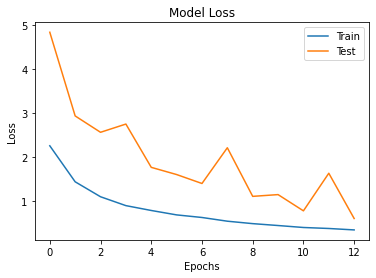

In [13]:
#model.save('model_fit_save.model')
#new_model = tf.keras.models.load_model('model_fit_save.h5')

# Show the model architecture
#new_model.summary()
plt.plot(custom.history['loss'])
plt.plot(custom.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()
#plt.savefig('model_loss.png')

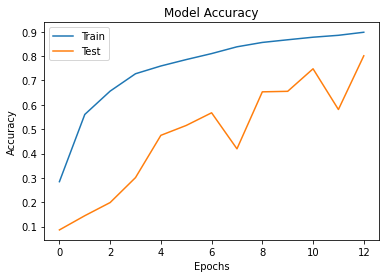

In [14]:
plt.plot(custom.history['accuracy'])
plt.plot(custom.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
#plt.savefig('model_accuracy.png')

In [15]:
predictions = model.predict(x_test)#Generates output predictions for the input samples.
predictions

array([[1.4826575e-04, 7.2139555e-05, 8.1419617e-05, ..., 3.9216771e-05,
        2.4411588e-03, 1.9332023e-04],
       [1.2842037e-02, 9.2703260e-02, 6.4404024e-04, ..., 6.0271337e-03,
        1.4742931e-04, 4.2661735e-01],
       [4.1795050e-04, 2.0747707e-04, 4.4607010e-04, ..., 6.5373718e-03,
        6.0373228e-03, 2.1346202e-02],
       ...,
       [2.1903780e-03, 4.2009656e-03, 7.1755171e-01, ..., 5.4530155e-02,
        7.8545347e-02, 7.9525507e-04],
       [1.4617958e-03, 2.6533925e-03, 2.5248426e-04, ..., 6.2472105e-04,
        8.5773051e-01, 4.1182505e-04],
       [1.0144900e-05, 1.1177295e-05, 2.9845015e-04, ..., 6.6326302e-06,
        3.5504927e-06, 4.8312653e-05]], dtype=float32)

In [16]:
y_preds = [np.argmax(i) for i in predictions]

In [17]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 65  14   0   0   5   0   0   1   2   0   0   1   0   1   1]
 [  1  98   1   1   1   0   0   0   0   0   0   1   0   1   0]
 [  0   0  98   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  23   3   0   0   0   0   0   0   0   0   1   0]
 [  0   0   1   0  85   0   0   0   8   0   1   0   0   3   0]
 [  0   0   1   2  11  40   0   0   7   0  11   0   1   3  17]
 [  0   0   0   1   0   0  56   0   0   0   0   1   5   5   8]
 [  2   0   0   0   0   0   0  77  16   0   0   1   0   0   3]
 [  0   0   0   0   1   0   0   0 111   0   3   0   0   1   0]
 [  1   0   5   0   8   1   0   0  32  45   1   5   2   2   1]
 [  0   0   0   0   0   0   0   0   0   0 113   0   0   0   0]
 [  0   0   5   0   9   0   0   0   5   2   1  57   2   1   2]
 [  0   0   5   0   0   0   0   0   1   2   2   0  89   3   2]
 [  0   1   4   0   5   0   0   0   1   1   0   0   7  73   0]
 [  0   0   0   0   0   2   0   0   6   0   1   0   1   0  96]]
              precision    recall  f1-score   support


In [18]:
model.save('plant_disease_classifier_model/plant_disease_classifier_final.model')
model.save('plant_disease_classifier_model/plant_disease_classifier.h5')
#use plot png here
#plt.savefig('plant_disease_classifier_final.png')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: plant_disease_classifier_model/plant_disease_classifier_final.model\assets


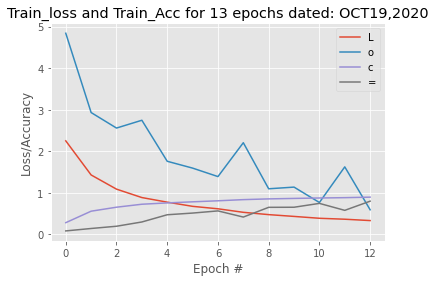

In [19]:
plt.style.use("ggplot")
plt.figure()
N=13
plt.plot(np.arange(0,N), custom.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), custom.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), custom.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), custom.history["val_accuracy"], label="val_acc")
plt.title("Train_loss and Train_Acc for 13 epochs dated: OCT19,2020")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend("Loc=upper right")
plt.savefig('plant_disease_classifier_model/plant_disease_13_epoch_plot.png')#save png image of the graph
plt.show()

In [20]:
model=load_model('plant_disease_classifier_model/plant_disease_classifier.h5')

In [21]:
webcam=cv2.VideoCapture(0)

In [22]:
classes=['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
         'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
         'Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
         'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']

In [ ]:
while webcam.isOpened():
    status,frame=webcam.read()
    bbox, label, conf = cv.detect_common_objects(frame)
    for idx, f in enumerate(bbox):
        (startX,startY)=f[0], f[1]
        (endX, endY)=f[2], f[3]
        cv2.rectangle (frame, (startX,startY), (endX,endY), (0,255,0), 2)
    
        img_crop=np.copy(frame[startY:endY, startX:endX])
        if(img_crop.shape[0]<10 or (img_crop.shape[1])<10):
            continue
        img_crop=cv2.resize(img_crop,(128,128))
        img_crop=img_crop.astype("float")/255.0
        img_crop=img_to_array(img_crop)
        img_crop=np.expand_dims(img_crop,axis=0)
    
        conf=model.predict(img_crop)[0]
    
        idx=np.argmax(conf)
    
        label=classes[idx]
    
        label="{}: {:.2f}%".format(label,conf[idx]*100)
    
        Y=startY = 10 if startY -10 > 10 else startY + 10
    
        cv2.putText(frame, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
    
    cv2.imshow("leaf detection", frame) 

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
webcam.release()
cv2.destroyAllWindows()